
## Step 0: Welcome to Colab

Welcome! This week you’ll practice **relationship analysis** between two variables in Python.
This means you’ll:

- Load real stock return data (Masco vs. S&P 500)
- Visualize data with **CDFs** (Cumulative Distribution Functions)

👉 Each step explains **what you’re doing**, **what operators/functions** you’ll use, and **why**.



## Step 1: Import Libraries

In this step, you’ll import basic Python libraries for data analysis.

- `pandas` for tables (like Excel)
- `numpy` for math (mean, std dev, arrays)
- `matplotlib.pyplot` for charts

👉 Operators: `import` keyword, `as` to shorten names.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Load Your Stock Return Data 📈

Here you’ll **mount your Google Drive**, locate your file, and load it into a **DataFrame**.

- Use `from google.colab import drive` to mount Drive.
- Use `pd.read_excel()` to read Excel files.
- Use `.head()` to preview.

👉 Operators: `from`, `import`, function calls, dot notation `.head()`


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Change the path if needed
file_path = '/content/drive/MyDrive/QM717-2025/Previous Python Studies/16 July Meeting/Masco  review session.xlsx'

# Load Excel file
masco_df = pd.read_excel(file_path)
masco_df['date'] = pd.to_datetime(masco_df['date'])
masco_df.head()


,PERMNO,date,RET,vwretd,sprtrn
0,34032,2004-01-30,-0.021525,0.023042,0.017276
1,34032,2004-02-27,0.051763,0.015443,0.012209
2,34032,2004-03-31,0.085592,-0.010662,-0.016359
3,34032,2004-04-30,-0.074573,-0.024222,-0.016791
4,34032,2004-05-28,0.033559,0.014068,0.012083



## Step 3: Compute & Plot CDFs

You’ll build **Cumulative Distribution Functions**:

- Use `np.sort()` to sort data.
- Use `np.linspace()` for percentiles.
- Plot with `plt.plot()`.

👉 This shows you the spread of returns.

Operators: functions like `np.sort()`, `plt.plot()`, indexing.


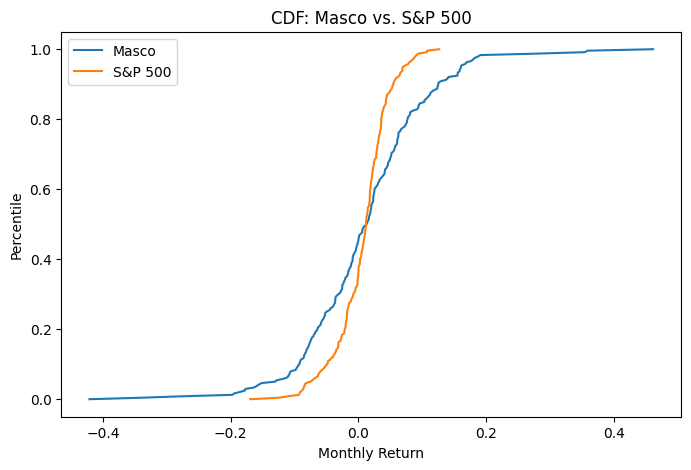

In [5]:

masco_sorted = np.sort(masco_df['RET'])
sp500_sorted = np.sort(masco_df['sprtrn'])
percentiles = np.linspace(0, 1, len(masco_sorted))

plt.figure(figsize=(8,5))
plt.plot(masco_sorted, percentiles, label='Masco')
plt.plot(sp500_sorted, percentiles, label='S&P 500')
plt.xlabel('Monthly Return')
plt.ylabel('Percentile')
plt.title('CDF: Masco vs. S&P 500')
plt.legend()
plt.show()


---
### ✏️ DIY #1: Try Your Own CDF
- Create a new CDF for `vwretd` (if you want to use the value-weighted market return column) or create one just for S&P 500 again but with a different color/style.
- Plot all three lines on the same chart: Masco, S&P 500, and your new one.
- What do you notice? Which return distribution is wider? Which is more stable?
---



## Step 4: Fractions of Losses & Gains 📉

Check how often big losses (≥10%) or gains (>10%) occur:

- Use Boolean conditions like `RET <= -0.10`
- Use `.mean()` to get fraction.

👉 This turns True/False to 1/0 then averages.

Operators: comparison operators (`<=`, `>`), `.mean()`.


In [6]:
loss_masco = (masco_df['RET'] <= -0.10).mean()
gain_masco = (masco_df['RET'] > 0.10).mean()

loss_sp500 = (masco_df['sprtrn'] <= -0.10).mean()
gain_sp500 = (masco_df['sprtrn'] > 0.10).mean()

print(f"Masco: Loss ≥10%: {loss_masco:.2%}, Gain >10%: {gain_masco:.2%}")
print(f"S&P 500: Loss ≥10%: {loss_sp500:.2%}, Gain >10%: {gain_sp500:.2%}")


Masco: Loss ≥10%: 8.33%, Gain >10%: 15.42%
S&P 500: Loss ≥10%: 1.25%, Gain >10%: 1.25%
